# ACS Demo

## Introduction

This notebook demonstrates how to load 
[US Census American Community Survey (ACS) 5-year data](https://www.census.gov/data/developers/data-sets/acs-5year.html)
and do demographic analysis on it. The process is very much parallel to how we loaded and used
[US Census redistricting data](https://www.census.gov/programs-surveys/decennial-census/about/rdo.html)
in the 
[SoMa DIS Demo](https://github.com/vengroff/censusdis/blob/main/notebooks/SoMa%20DIS%20Demo.ipynb)
and 
[Seeing White](https://github.com/vengroff/censusdis/blob/main/notebooks/Seeing%20White.ipynb)
notebooks.

## Imports and configuration

In [1]:
# So we can run from within the censusdis project and find the packages we need.
import os
import sys

sys.path.append(
    os.path.join(os.path.abspath(os.path.join(os.path.curdir, os.path.pardir)))
)

In [2]:
import censusdis.data as ced
import censusdis.states
from censusdis.maps import ShapeReader, clip_to_states

import divintseg as dis

In [3]:
# Set your API key here.
CENSUS_API_KEY = None

In [5]:
YEAR = 2019
DATASET = "acs/acs5"

In [6]:
# Feel free to try other states.
STATE = censusdis.states.STATE_NJ

## Make a metadata call to find out what fields are available

The group we chose is [B03002](https://api.census.gov/data/2019/acs/acs1/groups/B03002.html), 
which has race and ethnicity estimates down to the census block group level.

In [7]:
GROUP = "B03002"

In [8]:
leaves = ced.variables.group_leaves(DATASET, YEAR, GROUP)

## Load the data and compute diversity and integration

In [9]:
df_acs5 = ced.download_detail(
    DATASET,
    YEAR,
    leaves,
    state=STATE,
    block_group="*",
    api_key=CENSUS_API_KEY,
)

In [10]:
df_di = dis.di(
    df_acs5,
    by=["STATE", "COUNTY", "TRACT"],
    over="BLOCK_GROUP",
).reset_index()

df_di.head()

,STATE,COUNTY,TRACT,diversity,integration
0,34,001,000100,0.799079,0.742759
1,34,001,000200,0.774784,0.701973
2,34,001,000300,0.781342,0.726768
3,34,001,000400,0.765627,0.687127
4,34,001,000500,0.695903,0.685162


## Add geography to our dataframe

In [11]:
gdf_di = ced.add_inferred_geography(df_di, YEAR)

## Plot the data for the state

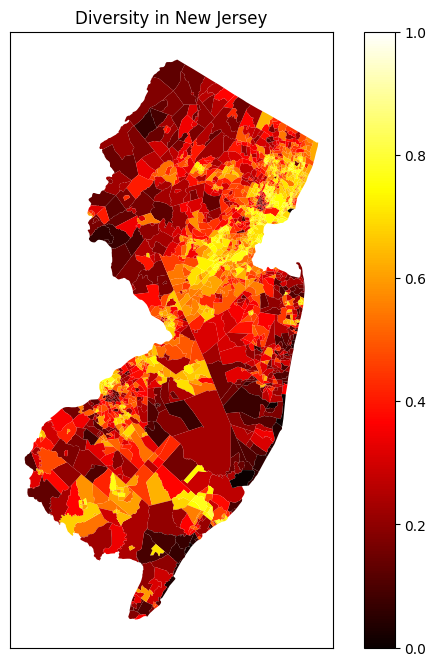

In [12]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (8, 8)

ax = gdf_di.plot(
    "diversity",
    cmap="hot",
    legend=True,
    vmin=0.0,
    vmax=1.0,
)

ax.set_title(f"Diversity in {censusdis.states.STATE_NAMES_FROM_IDS[STATE]}")

ax.tick_params(
    left=False,
    right=False,
    bottom=False,
    labelleft=False,
    labelbottom=False,
)